# 分析9月時，韓國瑜和陳其邁在各大媒體被報導的比重

### 預計看到的結果：政治傾向較傾國民黨的媒體對韓國瑜有較高的報導比重，較傾民進黨的媒體對陳其邁有較高的報導比重

In [2]:
import pandas as pd
from collections import Counter

In [3]:
file = pd.read_csv("201809_data.csv")
file.head()

,Date,Page_Name,Page_ID,Link,Type,All_Reaction_Count,LIKE_COUNT,WOW_COUNT,LOVE_COUNT,HAHA_COUNT,SAD_COUNT,ANGRY_COUNT,Comment_Count,Share_Count,Message,Link_Title,Link Description,created_time
0,2018/09/01 17:44:08,柯文哲,136845026417486,NaN,photo,35387,33342,61,774,1175,5,30,492,163,我在北門廣場，下完一場大雨，大家剛剛有看到彩虹嗎？\n \n#taipeipossible\...,NaN,NaN,1535795048000
1,2018/09/01 21:30:15,柯文哲,136845026417486,NaN,photo,15184,14750,72,299,44,2,17,318,72,下午北門的拍照活動，突然下了一場傾盆大雨，但看見媒體朋友為了捕捉畫面，淋著大雨堅守在現場沒有...,NaN,NaN,1535808615000
2,2018/09/01 20:08:51,陳佩琪Peggy,635993403161727,NaN,photo,11882,11343,11,247,276,0,5,233,60,每個人剛開始應對媒體， 相信都是一種壓力，我當醫生30年了， 有時遇到重大醫療事件， 常有媒...,Photos from 陳佩琪Peggy's post,NaN,1535803731000
3,2018/09/01 08:30:01,China Times,188311137478,NaN,link,4291,4064,20,64,141,1,1,244,99,高雄會不會來個結構性的大變天？？\n\n#高雄 #韓國瑜 (#嘴編肉),高雄》2006年戰局重演？ 前扁辦主任：高雄可能翻盤！,南部暴雨，蔡政府遭批治水破功，重創形象，曾任陳水扁辦公室主任的陳淞山直指，民進黨執政若再不好...,1535761801000
4,2018/09/01 14:45:49,林佳龍,153819538009272,NaN,photo,3945,3756,8,58,105,3,15,77,46,『厚，跟你出來...每天吃冷掉的Pizza！』\n\n一位跟佳龍出訪東京的記者，曾經這樣跟佳...,NaN,NaN,1535784349000


## 統計各大粉絲團和媒體的發文數量，抓出所要分析的媒體

In [4]:
page_name = file["Page_Name"]
result = sorted(Counter(page_name).items() , key = lambda x:x[1] , reverse = True)
result[0:100]

[('藍色力量', 616),
 ('反蔡英文聯盟－全國民怨嗆蔡總部', 479),
 ('新頭殼newtalk', 474),
 ('請民進黨還給中華民國一個公平正義', 436),
 ('反民進黨粉絲團', 426),
 ('青天白日正義力量', 425),
 ('為國挺柱向前行', 419),
 ('民間大小事', 419),
 ('udn.com 聯合新聞網', 411),
 ('ETtoday筋斗雲', 369),
 ('2018反蔡英文暴政聯盟', 335),
 ('中華民國網路後援會', 323),
 ('媒體還在政治助選造勢嗎?', 318),
 ('China Times', 310),
 ('風傳媒', 303),
 ('自由時報', 260),
 ('民報', 247),
 ('PTT Gossiping 批踢踢八卦板', 238),
 ('指傳媒 Fingermedia', 238),
 ('反抗中共併呑，一票不投泛藍', 231),
 ('酸酸時事鐵絲團', 226),
 ('全國軍公教、醫護及各界專業人仕拒投國民黨', 225),
 ('鬼島亂爆', 217),
 ('守護台灣聯盟', 214),
 ('社團法人中華民國端正選風促進會', 209),
 ('鬼島狂新聞', 209),
 ('TVBS 少康戰情室', 207),
 ('Power TV 爆發力傳媒', 203),
 ('三立新聞', 189),
 ('罷免民進黨', 186),
 ('靠北時事', 185),
 ('三立54天后宮', 184),
 ('靠北民進黨', 178),
 ('Yahoo!奇摩新聞', 172),
 ('打馬悍將粉絲團', 165),
 ('TVBS 新聞', 160),
 ('聯合報', 160),
 ('上報', 153),
 ('NOWnews 今日新聞', 148),
 ('民視新聞', 140),
 ('楊梅新聞網、中壢新聞網、桃園新聞網', 126),
 ('每日關心柯神教暨昌神教教主木木冠亻壬的波文情況', 125),
 ('壹電視 Next TV', 124),
 ('中國國民黨新北市後援團', 122),
 ('政經看民視  民視看正晶', 120),
 ('蘋果日報 台灣', 114),
 ('鄭文燦', 111),
 ('呼籲

### 將同樣來源的文章彙集在一起

In [5]:
df = pd.DataFrame()
page_name_ser = file["Page_Name"]
message_ser = file["Message"]
message_ser = message_ser.astype(str)

df["Page_Name"] = page_name_ser
df["Message"] = message_ser

merge_data = df.groupby(["Page_Name"])["Message"].apply(" ".join).reset_index()
merge_data

,Page_Name,Message
0,"""吃醋，是因为喜欢你~ 生气，是因为在乎你~ 发呆，是因为想念你~ 伤心，是因为不想失...",柯文哲只是想要搭公車上班啊！\n難怪柯文哲會生氣！\n這都是第二次了啊！
1,* 跟你在一起是幸福 *,這手勁似乎有點大力.....事後蘇貞昌也回應了！
2,104教室,#學習 #104教室 #期間限定 #只有2個禮拜 #資料科學\n\n粉絲限定搶先問🙋‍♀🙋‍...
3,107年台北市長候選人吳蕚洋 - 二哥,記得小時候某日有人突如其來的造訪父親，說了一些拜託等等的話，隨後就拿出一個小紙袋要送給父親，...
4,1111中台灣《生活的好朋友！》,「亞洲會展產業論壇」於昨日盛大開幕，多國代表聚集，台中近來不斷爭取舉辦國際盛會的機會，也證明...
5,168周報,郭文貴：馬雲替貪官政治洗錢 命懸一線 馬化騰的下場會更慘！\n李健明：精選超微概念 南電 健...
6,17Cross跨境電商生態村,🔥未來貿易ing🔥\n有柯文哲的台北跨境電商年度大會來了！\n想聽柯P阿伯講跨境電商嗎？\n...
7,17T17P,nan nan
8,17hoya8財經數位多媒體,名嘴節目猛轟「柯文哲讓台北塞爆」 找民眾CALL-IN幫腔「太誇張了啦」讓他一秒綠臉 名嘴節...
9,1969L&V-Cultural & Creative International,北極32度，熾熱地球空污嚴重，台灣還燒嗎⋯？


In [7]:
import jieba
from sklearn import feature_extraction 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### 去除標點符號的函數

In [243]:
import string
string.punctuation
def strclear(text):
    import string 
    signtext = string.punctuation +  "，\n、。！【】.「」：？《》: http ；% $ & % @ # = + / \ n 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z  a b c d e f g h i j k l m n o p q r s t u v w x y z ¯ °´ ·× ŏ ʋ ʖ ˊ ˋ˘ ˙  Σ δ ε ι" 
    signrepl = '@'*len(signtext) 
    signtable = str.maketrans(signtext,signrepl)  
    return text.translate(signtable).replace('@','')  

In [574]:
md_0= merge_data[merge_data["Page_Name"] == "新頭殼newtalk"]
md_1 = merge_data[merge_data["Page_Name"] == "udn.com 聯合新聞網"]
md_2 = merge_data[merge_data["Page_Name"] == "ETtoday筋斗雲"]
md_3 = merge_data[merge_data["Page_Name"] == "風傳媒"]
md_4 = merge_data[merge_data["Page_Name"] == "自由時報"]
md_5 = merge_data[merge_data["Page_Name"] == "PTT Gossiping 批踢踢八卦板"]
md_6 = merge_data[merge_data["Page_Name"] == "三立新聞"]
md_7 = merge_data[merge_data["Page_Name"] == "TVBS 新聞"]
md_8 = merge_data[merge_data["Page_Name"] == "聯合報"]
md_9 = merge_data[merge_data["Page_Name"] == "民視新聞"]
md_10 = merge_data[merge_data["Page_Name"] == "美麗島電子報"]
merge_df = pd.concat([md_0,md_1,md_2,md_3,md_4,md_5,md_6,md_7,md_8,md_9,md_10], axis = 0)

md0_clear = strclear(str(list(md_0["Message"])))
md1_clear = strclear(str(list(md_1["Message"])))
md2_clear = strclear(str(list(md_2["Message"])))
md3_clear = strclear(str(list(md_3["Message"])))
md4_clear = strclear(str(list(md_4["Message"])))
md5_clear = strclear(str(list(md_5["Message"])))
md6_clear = strclear(str(list(md_6["Message"])))
md7_clear = strclear(str(list(md_7["Message"])))
md8_clear = strclear(str(list(md_8["Message"])))
md9_clear = strclear(str(list(md_9["Message"])))
md10_clear = strclear(str(list(md_10["Message"])))


doc_list = [md0_clear , md1_clear , md2_clear , md3_clear , md4_clear , md5_clear, md6_clear, md7_clear , md8_clear , md9_clear , md10_clear]

    
    
doc_title = [ ]
merge_df_title = merge_df["Page_Name"]
for i in merge_df_title:
    doc_title.append(i)
    
#doc_title
#doc_list

jieba.load_userdict("term_2.txt")
doc_dict = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_title, doc_list)}
#doc_dict
doc_dict.keys()

dict_keys(['新頭殼newtalk', 'udn.com 聯合新聞網', 'ETtoday筋斗雲', '風傳媒', '自由時報', 'PTT Gossiping 批踢踢八卦板', '三立新聞', 'TVBS 新聞', '聯合報', '民視新聞', '美麗島電子報'])

### 製作出詞頻矩陣

In [245]:
import numpy as np

In [575]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in doc_dict.items()}
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]

wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

wfm

/Users/shulilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,̀,́,͜,͡,σ,ω,Д,д,з,Ծ,...,🚶,🤐,🤔,🤣,🤨,🤩,🤪,🤫,🤭,🧐
新頭殼newtalk,1.0,4.0,0.0,0.0,0.0,4.0,6.0,18.0,0.0,0.0,...,3.0,0.0,34.0,6.0,8.0,0.0,0.0,0.0,0.0,1.0
udn.com 聯合新聞網,0.0,0.0,3.0,6.0,8.0,2.0,0.0,4.0,0.0,0.0,...,0.0,1.0,8.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
ETtoday筋斗雲,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
風傳媒,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
自由時報,0.0,0.0,6.0,12.0,20.0,5.0,0.0,0.0,1.0,2.0,...,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
PTT Gossiping 批踢踢八卦板,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
三立新聞,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TVBS 新聞,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,3.0,0.0,0.0,3.0,0.0,10.0,0.0
聯合報,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
民視新聞,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0


### 以詞頻分析兩人在所篩選媒體中被提及的次數

In [576]:
han_chen_df = pd.DataFrame()

han_chen_df["韓國瑜"] = wfm["韓國瑜"]
han_chen_df["陳其邁"] = wfm["陳其邁"]
han_np = np.array(wfm["韓國瑜"])
chen_np = np.array(wfm["陳其邁"])
different_np = han_np - chen_np
different_ser = pd.Series(different_np , index = doc_title)
different_ser = different_ser.astype(float)
han_chen_df["差值：韓國瑜-陳其邁"] = different_ser
 
han_chen_df

,韓國瑜,陳其邁,差值：韓國瑜-陳其邁
新頭殼newtalk,33.0,47.0,-14.0
udn.com 聯合新聞網,169.0,62.0,107.0
ETtoday筋斗雲,15.0,2.0,13.0
風傳媒,18.0,10.0,8.0
自由時報,19.0,6.0,13.0
PTT Gossiping 批踢踢八卦板,10.0,1.0,9.0
三立新聞,6.0,1.0,5.0
TVBS 新聞,28.0,9.0,19.0
聯合報,12.0,1.0,11.0
民視新聞,12.0,14.0,-2.0


### 製作TF-IDF矩陣

In [577]:
transformer = TfidfTransformer()
tfidf_gem = transformer.fit_transform(wfm)
df_tfidf = pd.DataFrame(tfidf_gem.toarray() , columns = wfm.columns , index = doc_title)
df_tfidf

,̀,́,͜,͡,σ,ω,Д,д,з,Ծ,...,🚶,🤐,🤔,🤣,🤨,🤩,🤪,🤫,🤭,🧐
新頭殼newtalk,0.000605,0.002422,0.000000,0.000000,0.000000,0.001627,0.003633,0.009315,0.000000,0.000000,...,0.001816,0.000000,0.011347,0.002002,0.004140,0.000000,0.000000,0.000000,0.000000,0.000605
udn.com 聯合新聞網,0.000000,0.000000,0.009249,0.018499,0.024665,0.004846,0.000000,0.012332,0.000000,0.000000,...,0.000000,0.003607,0.015907,0.003977,0.000000,0.000000,0.000000,0.003607,0.000000,0.000000
ETtoday筋斗雲,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.041172,0.032505,0.000000,0.011793,0.000000,0.000000,0.000000,0.000000
風傳媒,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
自由時報,0.000000,0.000000,0.035296,0.070592,0.117653,0.023117,0.000000,0.000000,0.006882,0.013764,...,0.000000,0.000000,0.022764,0.022764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PTT Gossiping 批踢踢八卦板,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
三立新聞,0.000000,0.000000,0.000000,0.000000,0.000000,0.005326,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TVBS 新聞,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.024380,0.009142,0.000000,0.000000,0.016584,0.000000,0.055281,0.000000
聯合報,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.061478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
民視新聞,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.006108,0.014206,0.000000,0.000000,0.000000,0.000000,0.000000


## 繪製各大媒體對韓國瑜和陳其邁的報導比重

,media
0,新頭殼newtalk
1,udn.com 聯合新聞網
2,ETtoday筋斗雲
3,風傳媒
4,自由時報
5,PTT Gossiping 批踢踢八卦板
6,三立新聞
7,TVBS 新聞
8,聯合報
9,民視新聞


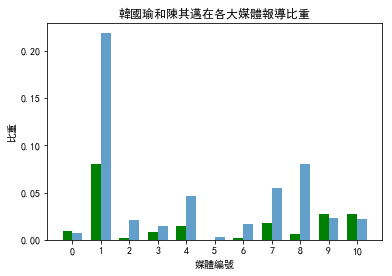

In [578]:
han_value = df_tfidf["韓國瑜"]
chen_value = df_tfidf["陳其邁"]
han_df = pd.DataFrame(han_value)
chen_df = pd.DataFrame(chen_value)
merge_df = pd.concat([han_value , chen_value] , axis = 1)
merge_df


plt.rcParams["font.sans-serif"] = ["simhei"] 
import matplotlib.pyplot as plt
x = [0,1,2,3,4,5,6,7,8,9,10]

plt.bar(x , han_value , alpha = 0.7 , align = "edge" , width = 0.35) 
plt.bar(x , chen_value , color = "green" , align = "edge" , width = -0.35)
plt.xticks(x)
plt.ylabel("比重")
plt.xlabel("媒體編號")
plt.title("韓國瑜和陳其邁在各大媒體報導比重")

merge_df_ser = pd.Series(merge_df.index)
df_1 = pd.DataFrame()
df_1["media"] = merge_df_ser
df_1

## 結論：
### 1.可以看出絕大多數所篩選的媒體對韓國瑜的報導比重較陳其邁高（11個中有8個）
### 2.可以看出韓國瑜和陳其邁在批踢踢八卦版的討論皆不熱烈
### 3.對韓國瑜有較高比重的前三名媒體分別為：聯合新聞網，聯合報，TVBS新聞，其政治傾向皆傾國民黨，與所預期看到的結果相符
### 4.傾民進黨的媒體如自由時報和三立新聞對陳其邁的提及比重較韓國瑜低，與所預期看到的結果不符